data file sources:

CDC Covid Data Tracker (Demographics): https://covid.cdc.gov/covid-data-tracker/#demographics
1. cases_by_race_ethnicity__18_-_29_years.csv
2. deaths_by_race_ethnicity__18_-_29_years.csv
3. cases_by_race_ethnicity__all_age_groups.csv

CDC Covid Data Tracker (Vaccination Demographics): https://covid.cdc.gov/covid-data-tracker/#vaccination-demographic
1. race_ethnicity_of_people_with_at_least_one_dose_administered.csv

COVID-19 Time-Series Metrics by County and State (California Health and Human Services): https://data.chhs.ca.gov/dataset/covid-19-time-series-metrics-by-county-and-state
1. covid19casesdemographics.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np
import datetime as dt

In [2]:
cases_18_29 = pd.read_csv('data_files/cases_by_race_ethnicity__18_-_29_years.csv', header=2, index_col=0)
death_18_29 = pd.read_csv('data_files/deaths_by_race_ethnicity__18_-_29_years.csv', header=2, index_col=0)

In [3]:
cases_18_29 = cases_18_29.sort_index(ascending=True)
death_18_29 = death_18_29.sort_index(ascending=True)

In [4]:
code = ['American Indian or Alaska Native','Asian','Black','Latino','Multi-Race','Native Hawaiian and other Pacific Islander','White']
cases_18_29.index = code
death_18_29.index = code

In [5]:
cases_death = pd.merge(left = cases_18_29, right = death_18_29, on='Percent of US population')
cases_death.index = code
cases_death

,Percent of cases,Percent of US population,Percentage of deaths
American Indian or Alaska Native,1.0,0.85,2.5
Asian,3.4,6.11,2.7
Black,10.5,14.44,24.4
Latino,32.9,21.96,38.4
Multi-Race,5.6,2.89,4.4
Native Hawaiian and other Pacific Islander,0.3,0.21,0.6
White,46.3,53.54,26.9


In [6]:
ca = pd.read_csv('data_files/covid19casesdemographics.csv')
ca['report_date'] = pd.to_datetime(ca['report_date'])
newest_date = max(ca['report_date'])
newest_date

Timestamp('2021-04-14 00:00:00')

In [7]:
ca = ca[(ca['demographic_category']=='Race Ethnicity')&(ca['report_date']==newest_date)]
ca

,demographic_category,demographic_value,total_cases,percent_cases,deaths,percent_deaths,percent_of_ca_population,report_date
3946,Race Ethnicity,American Indian or Alaska Native,9730,0.3,215,0.4,0.5,2021-04-14
4313,Race Ethnicity,Asian,197722,6.9,7092,12.1,15.4,2021-04-14
4680,Race Ethnicity,Black,118986,4.2,3702,6.3,6.0,2021-04-14
5047,Race Ethnicity,Latino,1591357,55.6,27452,46.8,38.9,2021-04-14
5414,Race Ethnicity,Multi-Race,48387,1.7,763,1.3,2.2,2021-04-14
5781,Race Ethnicity,Native Hawaiian and other Pacific Islander,15964,0.6,315,0.5,0.3,2021-04-14
6148,Race Ethnicity,Other,299537,10.5,801,1.4,0.0,2021-04-14
6515,Race Ethnicity,Total,2861737,100.0,58657,100.0,100.0,2021-04-14
6882,Race Ethnicity,White,580054,20.3,18317,31.2,36.6,2021-04-14


In [8]:
total_cases_percent = ca[['percent_cases', 'percent_of_ca_population','demographic_value']].groupby('demographic_value').max()
total_deaths_percent = ca[['percent_deaths', 'percent_of_ca_population','demographic_value']].groupby('demographic_value').max()

total_cases_percent = total_cases_percent.drop('Total',axis = 0)
total_deaths_percent = total_deaths_percent.drop('Total',axis = 0)

total_cases_percent.sort_index(inplace=True)
total_deaths_percent.sort_index(inplace=True)

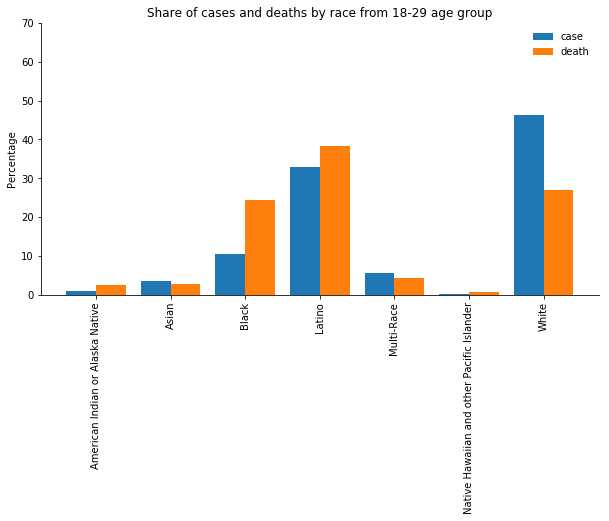

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

axis = np.arange(len(code))

plt.bar(axis-0.2,cases_death['Percent of cases'], 0.4, label = 'case')
plt.bar(axis+0.2,cases_death['Percentage of deaths'], 0.4, label = 'death')

plt.xticks(axis, code,rotation=90)

ax.legend(frameon=False)
ax.set_ylabel('Percentage')
ax.set_ylim(0,70)
ax.set_title('Share of cases and deaths by race from 18-29 age group')
sns.despine(ax=ax)

    
plt.show()

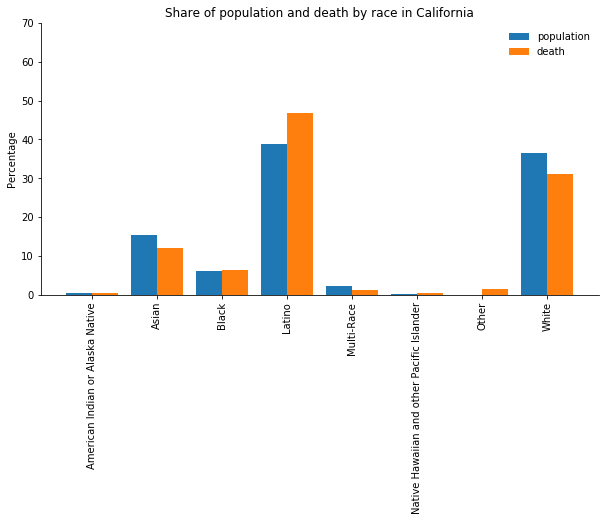

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

x = ['American Indian or Alaska Native','Asian','Black','Latino','Multi-Race','Native Hawaiian and other Pacific Islander','Other','White']
x_axis = np.arange(len(x))

plt.bar(x_axis-0.2,total_deaths_percent['percent_of_ca_population'], 0.4, label = 'population')
plt.bar(x_axis+0.2,total_deaths_percent['percent_deaths'], 0.4, label = 'death')


plt.xticks(x_axis, x,rotation=90)

plt.legend(frameon=False)
ax.set_ylabel('Percentage')
ax.set_ylim(0,70)
ax.set_title('Share of population and death by race in California')
sns.despine(ax=ax)

    
plt.show()

In [12]:
case_all = pd.read_csv('data_files/cases_by_race_ethnicity__all_age_groups.csv',header=2, index_col=0)
partial_dose = pd.read_csv('data_files/race_ethnicity_of_people_with_at_least_one_dose_administered.csv', header=3, index_col=0)

In [13]:
partial_dose

,Percentage,Count
Race/Ethnicity,,
Hispanic/Latino,8.6,3177610
White,66.1,24549940
American Indian/Alaska Native,1.6,577311
Asian,4.7,1737701
Black,7.5,2789615
Native Hawaiian/Other Pacific Islander,0.3,94999
Multiple/Other,11.4,4221157


In [14]:
case_all = case_all.sort_index(ascending=True)
partial_dose = partial_dose.sort_index(ascending=True)
case_all.index = code
partial_dose.index = code
partial_dose.columns = ['Percentage of dose','Count of getting dose']

In [15]:
case_dose = pd.merge(left = case_all, right = partial_dose, left_on=case_all.index, right_on=partial_dose.index)
case_dose

,key_0,Percent of cases,Count of cases,Percent of US population,Percentage of dose,Count of getting dose
0,American Indian or Alaska Native,1.0,146500,0.740,1.6,577311
1,Asian,3.3,489166,5.760,4.7,1737701
2,Black,11.0,1645888,12.540,7.5,2789615
3,Latino,29.5,4426297,18.450,8.6,3177610
4,Multi-Race,5.3,788545,2.220,11.4,4221157
5,Native Hawaiian and other Pacific Islander,0.3,43493,0.182,0.3,94999
6,White,49.7,7461772,60.110,66.1,24549940


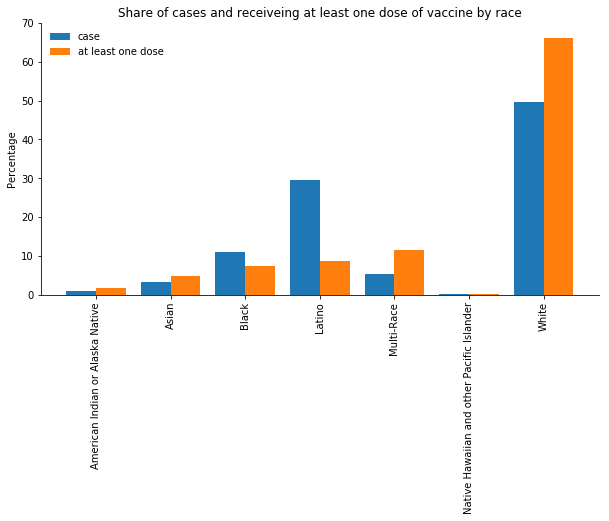

In [16]:
fig, ax = plt.subplots(figsize=(10,5))

axis = np.arange(len(code))

plt.bar(axis-0.2,case_dose['Percent of cases'], 0.4, label = 'case')
plt.bar(axis+0.2,case_dose['Percentage of dose'], 0.4, label = 'at least one dose')

plt.xticks(axis, code,rotation=90)

plt.legend(frameon=False)
ax.set_ylabel('Percentage')
ax.set_ylim(0,70)
ax.set_title('Share of cases and receiveing at least one dose of vaccine by race')
sns.despine(ax=ax)

    
plt.show()